In [43]:
import re
import pandas as pd
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
import gensim.corpora as corpora
import gensim
from pprint import pprint
import matplotlib.colors as mcolors
from collections import Counter
from matplotlib import pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
main_file = pd.read_csv('content/data_prep_2805_3.csv', usecols=['place', 'full_text'])
main_file

,place,full_text
0,Waikiki,"Built on a reclaimed swamp, two miles east of ..."
1,The Florida Keys,"Folklore, films and widespread hearsay have gi..."
2,Yellowstone National Park,America’s oldest and easily its most famous na...
3,The Big Island,Although the Big Island of Hawaii could hold a...
4,The Great Plains,The rolling hills and vast grasslands of the G...
...,...,...
95,Picos de Europa,The Picos de Europa may not be the highest mou...
96,Santander,"Easily the largest city in Cantabria, with a p..."
97,Malaga,MÁLAGA seems at first an uninviting place. It’...
98,Ibiza,"IBIZA, or Eivissa in Catalan, is an island of ..."


In [11]:
filtered_places = []

In [16]:
docs = main_file['full_text'].tolist()
len(docs)

100

In [17]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', '–'])

sentences_lower = []
for doc in docs:
    sentences = doc.split('.')
    for sentence in sentences:
        sentence_list = []
        sentence = sentence.lower()
        words = re.sub('['+string.punctuation+']', '', sentence).split()
        for word in words:
            if word not in stop_words:
                sentence_list.append(word)
        sentences_lower.append(sentence_list)

In [18]:
len(sentences_lower)

6683

In [20]:
id2word = corpora.Dictionary(sentences_lower)
id2word

In [21]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in sentences_lower]

# View
print(id2word)
print(corpus[:1][0][:30])

Dictionary<21772 unique tokens: ['ala', 'built', 'canal', 'city', 'downtown']...>
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [45]:
import gensim
from pprint import pprint

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
doc_lda

[(0,
  '0.005*"one" + 0.005*"city" + 0.004*"also" + 0.004*"around" + 0.003*"de" + '
  '0.003*"best" + 0.003*"first" + 0.003*"along" + 0.002*"town" + '
  '0.002*"south"'),
 (1,
  '0.008*"de" + 0.004*"city" + 0.003*"town" + 0.003*"it’s" + 0.003*"la" + '
  '0.003*"one" + 0.003*"north" + 0.002*"east" + 0.002*"years" + 0.002*"two"'),
 (2,
  '0.005*"city" + 0.005*"one" + 0.004*"de" + 0.003*"around" + 0.003*"lake" + '
  '0.003*"though" + 0.003*"town" + 0.003*"along" + 0.002*"it’s" + '
  '0.002*"still"'),
 (3,
  '0.004*"it’s" + 0.004*"de" + 0.004*"one" + 0.004*"around" + 0.003*"town" + '
  '0.003*"city" + 0.003*"main" + 0.003*"many" + 0.003*"though" + '
  '0.002*"centre"')]


In [52]:
#lda_model.save('lda_model')

In [46]:
topics = lda_model.show_topics(formatted=False)

In [47]:
data_flat = [w for w_list in sentences_lower for w in w_list]

In [48]:
counter = Counter(data_flat)

In [49]:
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

In [50]:
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
df.head(20)

,word,topic_id,importance,word_count
0,one,0,0.005339,536
1,city,0,0.004732,530
2,also,0,0.004096,336
3,around,0,0.003696,395
4,de,0,0.003389,609
5,best,0,0.003209,226
6,first,0,0.002767,232
7,along,0,0.002504,262
8,town,0,0.002405,370
9,south,0,0.002303,241


In [55]:
df.to_csv('topic_model.csv', index=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_29420\3007878727.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_29420\3007878727.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_29420\3007878727.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_29420\3007878727.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


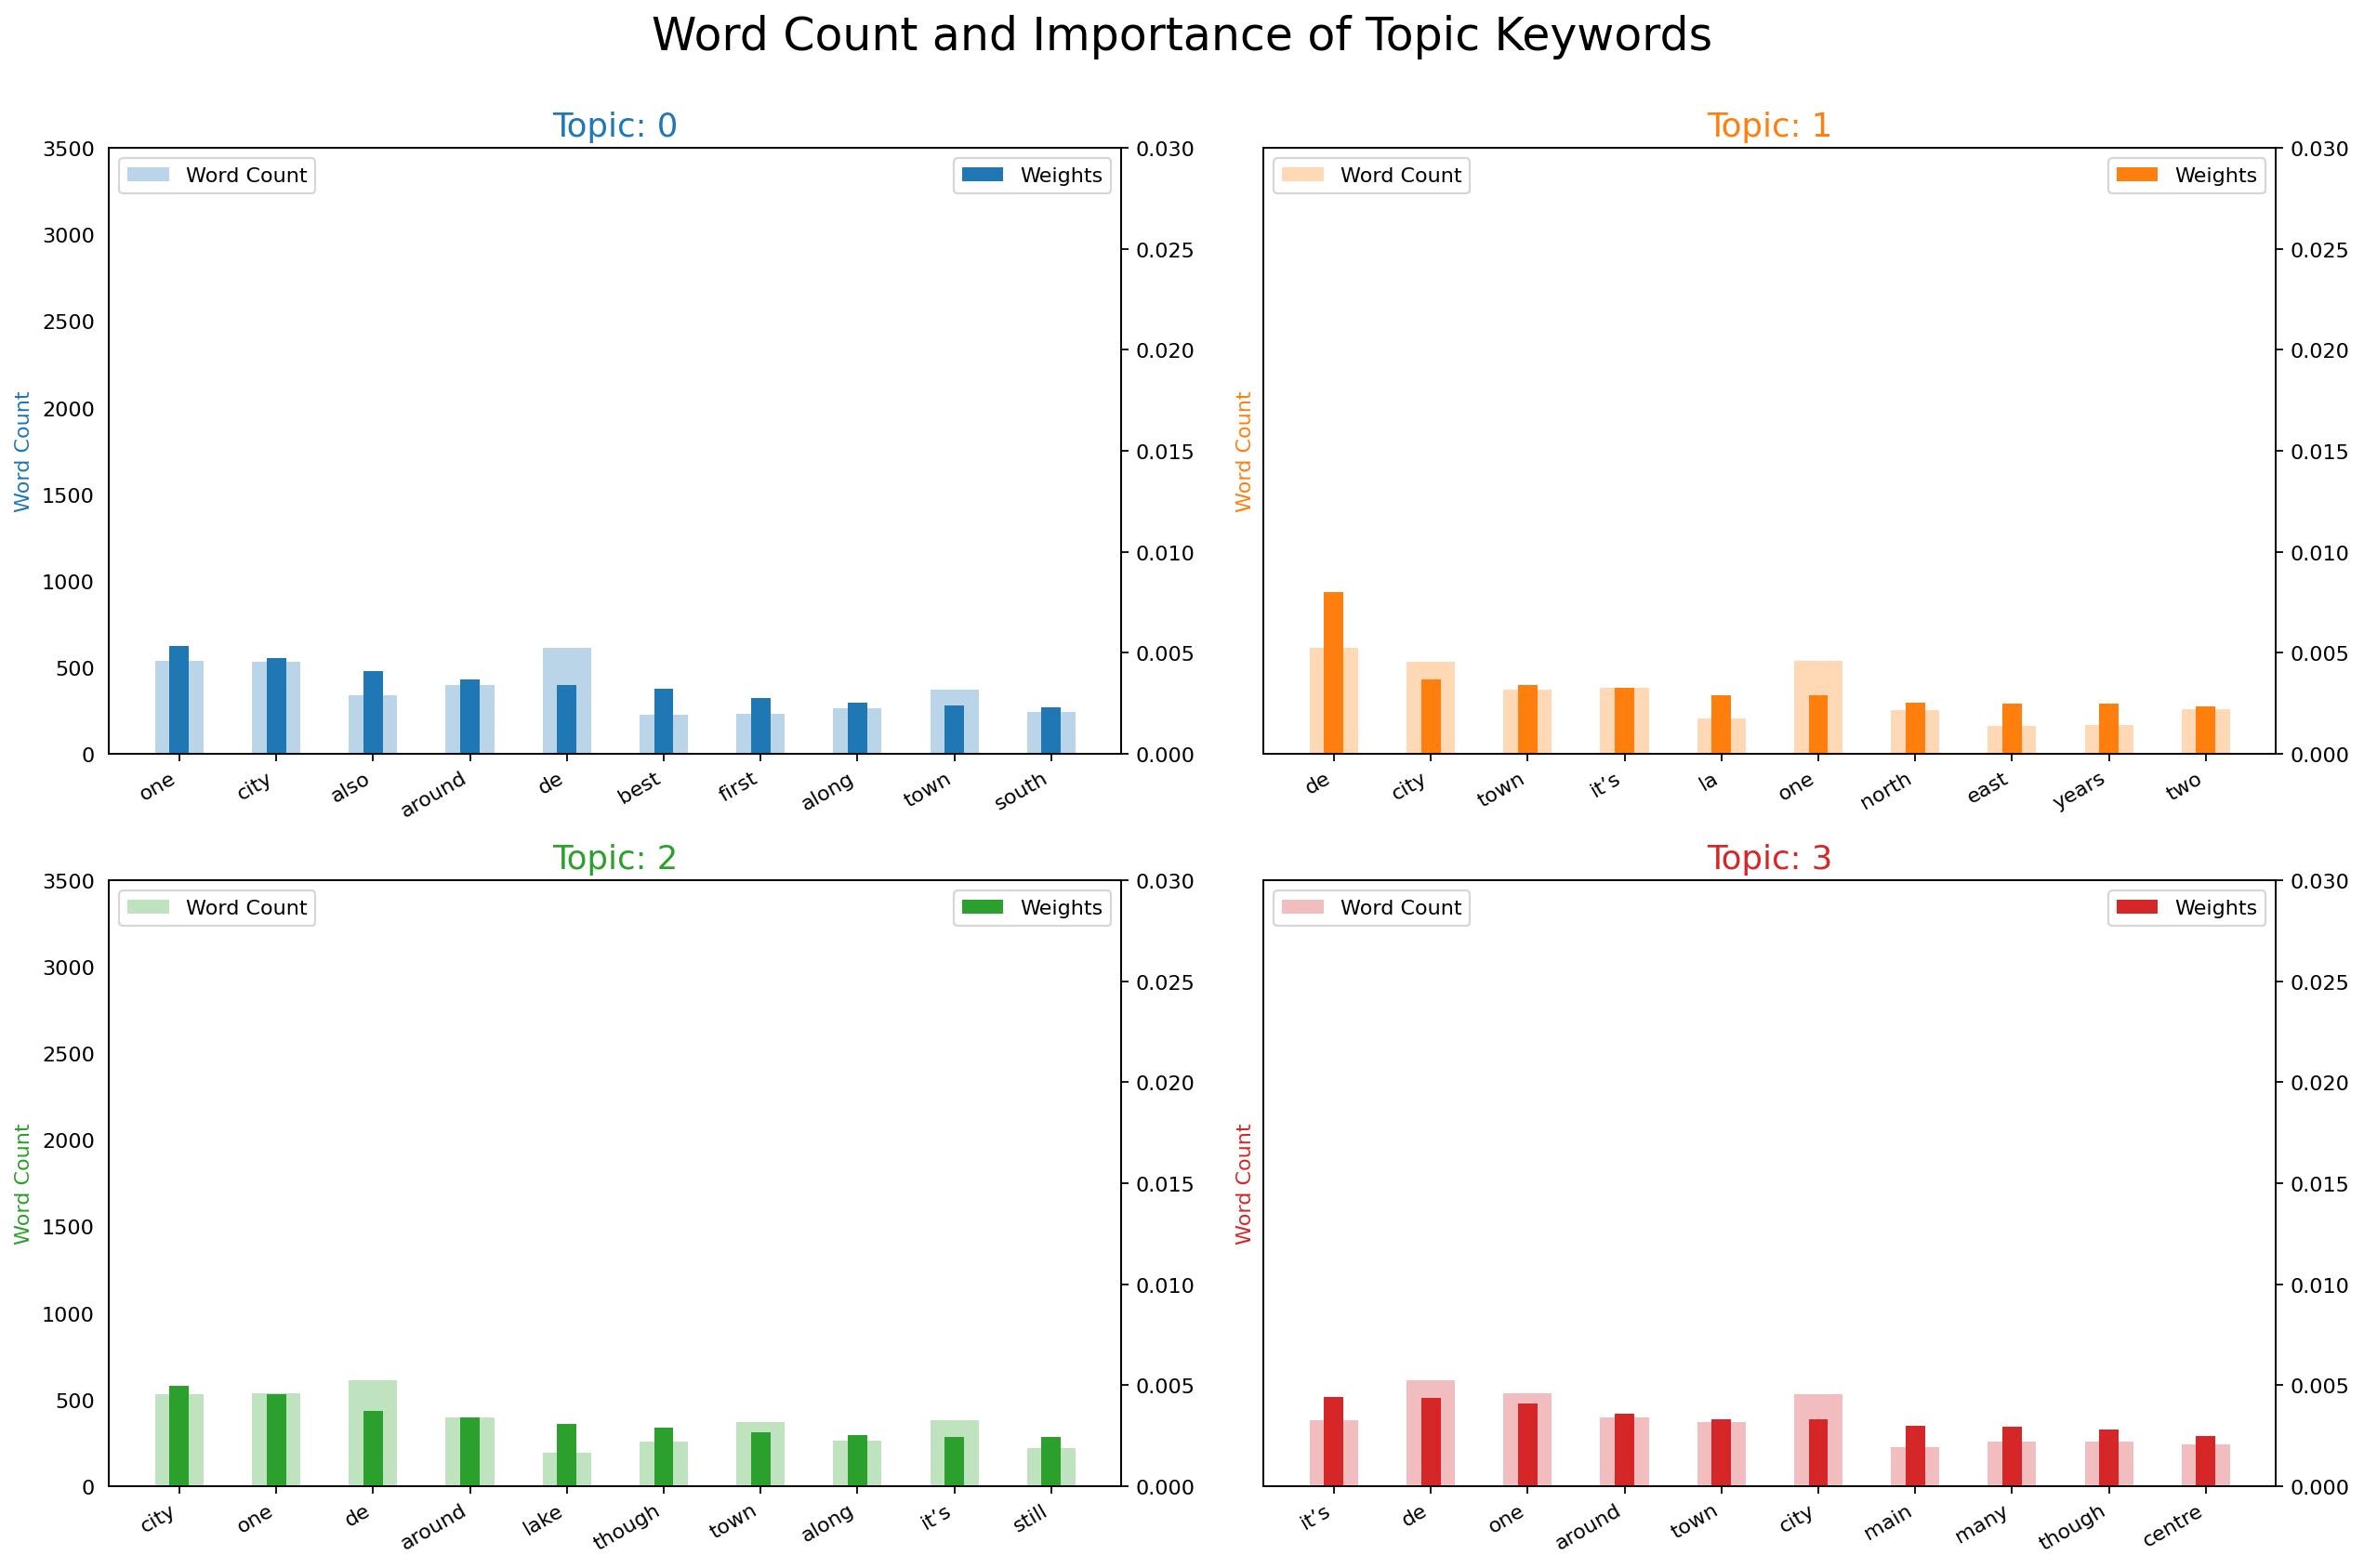

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()